# Ejercicio 2

Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [ ]:
import numpy as np

# Cargar los datos, ignorando la segunda columna
data = np.loadtxt('sample_data/M_5.txt')

# Separar la primera columna (clases) y las variables (excluyendo la segunda columna)
clases = data[:, 0]  # Primera columna (clases)
variables = np.delete(data, 1, axis=1)  # Eliminar la segunda columna (ignorada)

# Mostrar las primeras filas de las clases y las variables
print("Clases:", clases[:5])
print("Variables (primeras 5 filas):\n", variables[:5, :])


Clases: [1. 1. 1. 1. 1.]
Variables (primeras 5 filas):
 [[ 1.          0.15991005  0.82903782 ...  0.87855426  1.63603899
   1.60896884]
 [ 1.         -1.03964581  0.06158144 ...  0.67610431  0.75054922
   1.04006595]
 [ 1.         -1.41164407 -1.09091459 ...  0.36203866  1.59177889
   1.53300746]
 [ 1.         -2.6459736   0.12978829 ...  2.5321943   0.34460084
  -0.867472  ]
 [ 1.         -1.69286003 -1.59763231 ...  1.38472232  0.45231775
   0.7562994 ]]


Distribución de clases: Counter({1.0: 90, 2.0: 90, 3.0: 90, 4.0: 90, 5.0: 90, 6.0: 90, 7.0: 89})


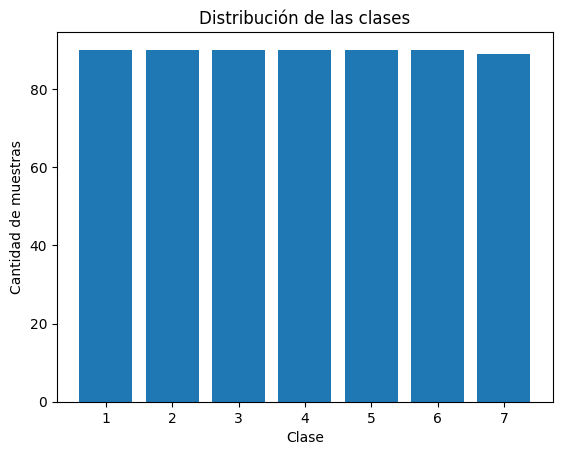

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Contar la cantidad de ejemplos en cada clase
conteo_clases = Counter(clases)

# Mostrar el conteo de cada clase
print("Distribución de clases:", conteo_clases)

# Graficar la distribución de las clases
plt.bar(conteo_clases.keys(), conteo_clases.values())
plt.xlabel('Clase')
plt.ylabel('Cantidad de muestras')
plt.title('Distribución de las clases')
plt.show()


Observamos que ya esta balanceado y no es necesario utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada

Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Escalar las variables
scaler = StandardScaler()

# Definir los modelos
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Multilayer Perceptron': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier()
}

# Evaluar los modelos con validación cruzada
resultados = {}
for nombre, modelo in modelos.items():
    # Crear un pipeline que escale las variables y aplique el modelo
    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', modelo)
    ])

    # Validación cruzada con 5 particiones
    scores = cross_val_score(pipeline, variables, clases, cv=5, scoring='accuracy')

    # Guardar los resultados
    resultados[nombre] = np.mean(scores)
    print(f"{nombre}: Accuracy promedio = {np.mean(scores):.4f}")

# Determinar el modelo más efectivo
mejor_modelo = max(resultados, key=resultados.get)
print(f"\nEl modelo más efectivo es: {mejor_modelo} con una precisión de {resultados[mejor_modelo]:.4f}")



Logistic Regression: Accuracy promedio = 0.9602
Support Vector Machine: Accuracy promedio = 0.9348
Decision Tree: Accuracy promedio = 0.9904
Random Forest: Accuracy promedio = 0.9252
K-Nearest Neighbors: Accuracy promedio = 0.8393
Gaussian Naive Bayes: Accuracy promedio = 1.0000
Multilayer Perceptron: Accuracy promedio = 0.9125
AdaBoost: Accuracy promedio = 0.4565

El modelo más efectivo es: Gaussian Naive Bayes con una precisión de 1.0000


Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

KNeighborsClassifier y el DecisionTreeClassifier

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# Configuración de la validación cruzada anidada
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir los hiperparámetros para cada modelo
param_grid_knn = {
    'classifier__n_neighbors': np.arange(1, 21)  # Probar valores de k entre 1 y 20
}

param_grid_tree = {
    'classifier__max_depth': np.arange(1, 21)  # Probar valores de max_depth entre 1 y 20
}

# Modelos a evaluar con validación cruzada anidada
modelos = {
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': param_grid_knn
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': param_grid_tree
    }
}

resultados = {}

# Evaluar cada modelo con validación cruzada anidada
for nombre, info in modelos.items():
    print(f"Evaluando {nombre}...")

    # Crear un pipeline que escale las variables y aplique el modelo
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', info['model'])
    ])

    # Configurar GridSearchCV para validación cruzada anidada
    grid_search = GridSearchCV(pipeline, info['param_grid'], cv=outer_cv, scoring='accuracy')

    # Validación cruzada anidada
    grid_search.fit(variables, clases)

    # Guardar los resultados
    resultados[nombre] = {
        'mejor_modelo': grid_search.best_estimator_,
        'mejores_parametros': grid_search.best_params_,
        'accuracy_promedio': np.mean(grid_search.cv_results_['mean_test_score'])
    }

# Imprimir los resultados
for nombre, info in resultados.items():
    print(f"\n{nombre}:")
    print(f"  Mejor Modelo: {info['mejor_modelo']}")
    print(f"  Mejores Hiperparámetros: {info['mejores_parametros']}")
    print(f"  Precisión Promedio: {info['accuracy_promedio']:.4f}")

# Evaluar el modelo final con la mejor configuración en todo el conjunto de datos
for nombre, info in resultados.items():
    print(f"\nEvaluando el modelo final para {nombre}...")
    final_model = info['mejor_modelo']
    y_pred = cross_val_predict(final_model, variables, clases, cv=5)
    print(classification_report(clases, y_pred))


Evaluando K-Nearest Neighbors...
Evaluando Decision Tree...

K-Nearest Neighbors:
  Mejor Modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=12))])
  Mejores Hiperparámetros: {'classifier__n_neighbors': 12}
  Precisión Promedio: 0.8732

Decision Tree:
  Mejor Modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(max_depth=6))])
  Mejores Hiperparámetros: {'classifier__max_depth': 6}
  Precisión Promedio: 0.8934

Evaluando el modelo final para K-Nearest Neighbors...
              precision    recall  f1-score   support

         1.0       0.95      0.88      0.91        90
         2.0       0.62      0.61      0.62        90
         3.0       1.00      0.87      0.93        90
         4.0       0.98      0.93      0.95        90
         5.0       0.91      0.91      0.91        90
         6.0       0.61      0.78      0.69        90
         7.0       0.98      0

Prepara tus modelos para producción haciendo lo siguiente:

A)Opten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.

B)Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Configuración para GridSearchCV
param_grid_knn = {
    'classifier__n_neighbors': np.arange(1, 21)  # Probar valores de k entre 1 y 20
}

param_grid_tree = {
    'classifier__max_depth': np.arange(1, 21)  # Probar valores de max_depth entre 1 y 20
}

# Modelos a evaluar con GridSearchCV
modelos = {
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': param_grid_knn
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': param_grid_tree
    }
}

# Buscar los mejores hiperparámetros utilizando todo el conjunto de datos
resultados = {}
for nombre, info in modelos.items():
    print(f"Optimizando {nombre}...")

    # Crear un pipeline que escale las variables y aplique el modelo
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', info['model'])
    ])

    # Configurar GridSearchCV para búsqueda de hiperparámetros
    grid_search = GridSearchCV(pipeline, info['param_grid'], cv=5, scoring='accuracy')

    # Ajustar GridSearchCV con todo el conjunto de datos
    grid_search.fit(variables, clases)

    # Guardar los resultados
    resultados[nombre] = {
        'mejor_modelo': grid_search.best_estimator_,
        'mejores_parametros': grid_search.best_params_
    }

# Imprimir los resultados
for nombre, info in resultados.items():
    print(f"\n{nombre}:")
    print(f"  Mejor Modelo: {info['mejor_modelo']}")
    print(f"  Mejores Hiperparámetros: {info['mejores_parametros']}")

# Ajustar el modelo final con todos los datos
for nombre, info in resultados.items():
    print(f"\nAjustando el modelo final para {nombre}...")
    final_model = info['mejor_modelo']
    final_model.fit(variables, clases)
    print(f"{nombre} ajustado con todos los datos.")


Optimizando K-Nearest Neighbors...
Optimizando Decision Tree...

K-Nearest Neighbors:
  Mejor Modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=6))])
  Mejores Hiperparámetros: {'classifier__n_neighbors': 6}

Decision Tree:
  Mejor Modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(max_depth=13))])
  Mejores Hiperparámetros: {'classifier__max_depth': 13}

Ajustando el modelo final para K-Nearest Neighbors...
K-Nearest Neighbors ajustado con todos los datos.

Ajustando el modelo final para Decision Tree...
Decision Tree ajustado con todos los datos.


**¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?**

Cuando los datos no son balanceados los modelos pueden estar sesgados hacia la clase mayoritaria.

**¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.**

K-Nearest Neighbors parece ser efectivo si las características están bien distribuidas y los datos tienen una estructura clara.

Decision Tree tambien parece ser efectivo con este set de datos, en el caso de los datos ya balanceados el modelo Gaussian Naive Bayes parece ser muy efectivo.

**¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.**

Al optimizar hiperparámetros, podemos mejorar la precisión del modelo al ajustar parámetros clave. Esto lo logramos haciendo que el modelo se adapte mejor a nuestros datos.

**¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?**

 La búsqueda exhaustiva de hiperparámetros puede ser muy costosa en términos de tiempo y recursos computacionales